In [1]:
%matplotlib inline

In [2]:
from nose.tools import assert_true, assert_equal, assert_false, assert_almost_equal, assert_raises
import math
import matplotlib.pyplot as pp
import numpy as np

# Playing with Primes

## Encyrption is in the Center of Public Debate
* [CNN, "ISIS using encryption to evade FBI"](http://www.cnn.com/2015/07/08/politics/fbi-comey-isis-encryption-recruitment/)
* [Wired, "Security Manual Reveals the OPSEC Advice ISIS Gives Recruits"](http://www.wired.com/2015/11/isis-opsec-encryption-manuals-reveal-terrorist-group-security-protocols/)
* [Fortune, "Former National Security Officials Support Encryption"](http://fortune.com/2015/12/16/national-security-encryption/)

## Encryption Relies on Mathematics
### Encryption Relies on Prime Numbers


>[Public-key] was invented in 1976 by two Stanford
mathematicians, Whitfield Diffie and Martin Hellman. Their discovery can be phrased simply:
enciphering schemes should be asymmetric. For thousands of years all ciphers were symmetric –
the key for encrypting a message was identical to the key for decrypting it, but used, so to speak,
in reverse. To change “5 100 100 5 15 55” or “6 120 120 6 18 66” back into “attack,” for instance,
one simply reverses the encryption by dividing the numbers with the key, instead of multiplying
them, and then replaces the numbers with their equivalent letters. Thus sender and receiver must
both have the key, and must both keep it secret. The symmetry, Diffie and Hellman realized, is the
origin of the key-management problem. The solution is to have an encrypting key that is different
from the decrypting key – one key to encipher a message, and another, different key to decipher
it. With an asymmetric cipher, Alice could send encrypted messages to Bob without providing
him with a secret key. In fact, Alice could send him a secret message even if she had never before
communicated with him in any way.

>“If this sounds ridiculous, it should,” Schneier wrote in Secrets and Lies (2001). “It sounds
impossible. If you were to survey the world’s cryptographers in 1975, they would all have told you
it was impossible.” One year later, Diffie and Hellman showed that it was possible, after all. (Later
the British Secret Service revealed that it had invented these techniques before Diffie and Hellman,
but kept them secret – and apparently did nothing with them.)

>To be precise, Diffie and Hellman demonstrated only that public-key encryption was possible in
theory. Another year passed before three MIT mathematicians – Ronald L. Rivest, Adi Shamir,
and Leonard M. Adleman – figured out a way to do it in the real world. At the base of the RivestShamir-Adleman,
or RSA, encryption scheme is the mathematical task of factoring. Factoring
a number means identifying the prime numbers which, when multiplied together, produce that
number. Thus 126,356 can be factored into $2 \times 2 \times 31 \times 1,019$, where 2, 31, and 1,019 are all
prime. (A given number has only one set of prime factors.) 1 Surprisingly, mathematicians
regard factoring numbers – part of the elementary-school curriculum – as a fantastically difficult
task. Despite the efforts of such luminaries as Fermat, Gauss, and Fibonacci, nobody has ever
discovered a consistent, usable method for factoring large numbers. Instead, mathematicians try
potential factors by invoking complex rules of thumb, looking for numbers that divide evenly. For
big numbers the process is horribly time-consuming, even with fast computers. The largest number
yet factored is 155 digits long. It took 292 computers, most of them fast workstations, more than
seven months.

>Note something odd. **It is easy to multiply primes together. But there is no easy way to take
the product and reduce it back to its original primes.** In crypto jargon, this is a “trapdoor”: a
function that lets you go one way easily, but not the other. Such one-way functions, of which
this is perhaps the simplest example, are at the bottom of all public-key encryption. They make
asymmetric ciphers possible.

>To use RSA encryption, Alice first secretly chooses two prime numbers, p and q, each more than
a hundred digits long. This is easier than it may sound: there are an infinite supply of prime
numbers. Last year a Canadian college student found the biggest known prime: $2^{13466917} − 1$. It
has 4,053,946 digits; typed without commas in standard 12-point type, the number would be more
than ten miles long. Fortunately Alice doesn’t need one nearly that big. She runs a program that
randomly selects two prime numbers for her and then she multiplies them by each other, producing
pq, a still bigger number that is, naturally, not prime. This is Alice’s“public key.” (In fact, creating
the key is more complicated than I suggest here, but not wildly so.)

>As the name suggests, public keys are not secret; indeed, the Alices of this world often post
them on the Internet or attach them to the bottom of their e-mail. When Bob wants to send Alice
a secret message, he first converts the text of the message into a number. Perhaps, as before, he
transforms “attack” into “5 100 100 5 15 55.” Then he obtains Alice’s public key – that is, the
number pq – by looking it up on a Web site or copying it from her e-mail. (Note here that Bob does
not use his own key to send Alice a message, as in regular encryption. Instead, he uses Alice’s key.)
Having found Alice’s public key, he plugs it into a special algorithm invented by Rivest, Shamir,
and Adleman to encrypt the message.

>At this point the three mathematicians’ cleverness becomes evident. Bob knows the product pq,
because Alice has displayed it on her Web site. But he almost certainly does not know p and q
themselves, because they are its only factors, and factoring large numbers is effectively impossible.
Yet the algorithm is constructed in such a way that to decipher the message the recipient must
know both p and q individually. Because only Alice knows p and q, Bob can send secret messages to
Alice without ever having to swap keys. Anyone else who wants to read the message will somehow
have to factor pq back into the prime numbers p and q. (["The science of encryption: prime numbers and mod n arithmetic"](https://math.berkeley.edu/~kpmann/encryption.pdf))

## How Do We Find Primes?

A really old way is known as the [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

The approach here is to create an array of numbers and cross out any number that is a multiple of a prime. As we loop through the array, any number that is not crossed out is a prime.

1. Allocate an array of integers (`nums`) between 2 and N+1
1. Start with i=0
1. Look at the ith number in the array (`nums[i]`), if it is not crossed out it is a prime.
    1. Add `nums[i]` to our list of primes
    1. Cross out all the multiples of `nums[i]`
    1. Increment i

In [9]:
def sievePrime(N):
    #step space the size of the prime e.g. 2, 3, 4 = 2 step 2 gets 4
    #pop out the primes and multiples? then we don't have to scan for the "crossed-out" number
    #nums = range(2:N+1)
    
    primes = []
    nums = np.arange(2,N+1) #make array
    for i in range(len(nums)):
        #print(nums)
        if nums[i] != 0: #0 is our "cross-out" value
            primes.append(nums[i])
            nums[i+nums[i]::nums[i]] = 0 #step through array with step size=the prime and replace multiples of the prime with 0
        #print(nums)
    return primes
sievePrime(20)

[2, 3, 5, 7, 11, 13, 17, 19]

In [ ]:
#without appending
#def sievePrime(N):
#    #step space the size of the prime e.g. 2, 3, 4 = 2 step 2 gets 4
#    #pop out the primes and multiples? then we don't have to scan for the "crossed-out" number
#    #nums = list[2:N+1:1]
    
#    nums = np.arange(2,N+1) #make array
#    for i in range(len(nums)):
#        #print(nums)
#        if nums[i] != 0: #0 is our "cross-out" value
#            nums[i+nums[i]::nums[i]] = 0 #step through array with step size=the prime and replace multiples of the prime with 0
#        #print(nums)
#    return [n for n in nums if n!= 0]

In [ ]:
def katiesWay(N):
    #doing it with a list
    #step space the size of the prime e.g. 2, 3, 4 = 2 step 2 gets 4
    #pop out the primes and multiples? then we don't have to scan for the "crossed-out" number
    #nums = range(2:N+1)
    
    primes = []
    nums = list(range((2,N+1))
    for i in range(len(nums)):
        #print(nums)
        if nums[i] != 0: #0 is our "cross-out" value
            primes.append(nums[i])
            for j in range(i+nums[i], len(nums), nums[i]): #have to do for loop instead of slicing and assigning 
                                                           #because you get type error
                nums[j] = 0
        #print(nums)
    return primes

In [10]:
%timeit primes1 = sievePrime(10000)

6.81 ms ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
assert_equal(sievePrime(10), [2, 3, 5, 7])
assert_equal(sievePrime(20), [2, 3, 5, 7, 11, 13, 17, 19])

## What are some limitations of this approach?
1. We have to allocate a potentially large array (memory)
1. We loop through the entire list of numbers

### Given `N`, what is the largest number we would have to test division on to see if `N` is prime? 

### Let's write some alternative functions for finding primes

## Exercise:

modify `isprime2` to check whether a number is prime. Use `if` statements to test for the special cases ($n<2$, $n=2$, $n\mod2=0$). Use a for loop and the range function ($\text{range}(3,1+\sqrt{n}, 2)$)? Why $3$? Why $2$?

In [ ]:
def isprime2(n):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert_true(isprime2(47))
assert_false(isprime2(49))

## Exercise

Modify `isprime3` to check if a number `p` is Prime using list comprehension and the [`any`](https://docs.python.org/3/library/functions.html#any) function.

In [ ]:
def isprime3(p):
    # YOUR CODE HERE
    raise NotImplementedError()


In [ ]:
assert_true(isprime3(47))
a

In [ ]:
primes = [n for n in range(1,100) if isprime2(n)]
primes

In [ ]:
%timeit primes = [n for n in range(1,1000) if isprime2(n)]

In [ ]:
%timeit primes = [n for n in range(1,1000) if isprime3(n)]

## [Gilbreath's Conjecture](https://en.wikipedia.org/wiki/Gilbreath%27s_conjecture)

>Gilbreath's conjecture is a conjecture in number theory regarding the sequences generated by applying the forward difference operator to consecutive prime numbers and leaving the results unsigned, and then repeating this process on consecutive terms in the resulting sequence, and so forth. The statement is named after mathematician Norman L. Gilbreath who, in 1958, presented it to the mathematical community after observing the pattern by chance while doing arithmetic on a napkin. In 1878, eighty years before Gilbreath's discovery, François Proth had, however, published the same observations along with an attempted proof, which was later shown to be false.

#### Write a function ``seq_diff`` that computes the absolute value of the forward difference of a sequence of primes

**Hints:**
1. The `math` library defines an `fabs` which returns a floating point value for the absolute value.
1. Use the `range` function.
    1. What do you want for the starting value for `range`?
    1. What do you want for the ending value for `range`?
1. How will the length of the output differ from the length of the input?

In [ ]:
def seq_diff(seq):
    # YOUR CODE HERE
    raise NotImplementedError()

#### Test the output

In [ ]:
seq = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
assert_equal(seq_diff(seq), [1, 2, 2, 4, 2, 4, 2, 4, 6, 2, 6, 4, 2, 4])
assert_equal(seq_diff(seq_diff(seq)), [1, 0, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2])

In [ ]:
seq = [n for n in range(1,50) if isprime2(n)]
print(seq)
while True:
    if not seq:
        break   
    seq = seq_diff(seq)
    print(seq)

## Playing with Large Measured Data: [Benford's Law](https://en.wikipedia.org/wiki/Benford%27s_law)

#Benford's Law is that when measuring a bunch of large things, it's highly likely that a 1 is the first digit -- see data visualization below

In [12]:
import pandas as pd
import seaborn as sns

### We are going to use census data

In [13]:
pd.read_csv("PEP_2016_PEPANNRSIP.US12A_with_ann.csv", skiprows=1)

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Rank,Geography.1,Geography.2,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016
0,0100000US,NaN,United States,1620000US3651000,3651000,1,"United States - New York city, New York","New York city, New York",8175133,8174962,8192026,8284098,8361179,8422460,8471990,8516502,8537673
1,0100000US,NaN,United States,1620000US0644000,644000,2,"United States - Los Angeles city, California","Los Angeles city, California",3792621,3792584,3796292,3825393,3858137,3890436,3920173,3949149,3976322
2,0100000US,NaN,United States,1620000US1714000,1714000,3,"United States - Chicago city, Illinois","Chicago city, Illinois",2695598,2695620,2697736,2705404,2714120,2718887,2718530,2713596,2704958
3,0100000US,NaN,United States,1620000US4835000,4835000,4,"United States - Houston city, Texas","Houston city, Texas",2099451,2100277,2105625,2132157,2166458,2204406,2243999,2284816,2303482
4,0100000US,NaN,United States,1620000US0455000,455000,5,"United States - Phoenix city, Arizona","Phoenix city, Arizona",1445632,1447624,1450629,1469353,1499007,1525562,1554179,1582904,1615017
5,0100000US,NaN,United States,1620000US4260000,4260000,6,"United States - Philadelphia city, Pennsylvania","Philadelphia city, Pennsylvania",1526006,1526006,1528427,1539022,1550379,1555868,1560609,1564964,1567872
6,0100000US,NaN,United States,1620000US4865000,4865000,7,"United States - San Antonio city, Texas","San Antonio city, Texas",1327407,1327538,1333952,1359002,1385250,1411652,1439150,1468037,1492510
7,0100000US,NaN,United States,1620000US0666000,666000,8,"United States - San Diego city, California","San Diego city, California",1307402,1301722,1306153,1320686,1338983,1358242,1379299,1390915,1406630
8,0100000US,NaN,United States,1620000US4819000,4819000,9,"United States - Dallas city, Texas","Dallas city, Texas",1197816,1197824,1200711,1218664,1241624,1258016,1277376,1297327,1317929
9,0100000US,NaN,United States,1620000US0668000,668000,10,"United States - San Jose city, California","San Jose city, California",945942,952555,955290,970823,984151,1001580,1013237,1022627,1025350


In [14]:
city_populations = list(pd.read_csv("PEP_2016_PEPANNRSIP.US12A_with_ann.csv", skiprows=1)["Population Estimate (as of July 1) - 2016"])

## `city_populations` is a list of integers that are the populations of USA cities

### Create a list of all the populations greater than or equal to 100000 where the integers are converted to strings

In [15]:
#100000 is an arbitrary cut-off because we want large numbers
#what we want is the first digit in those numbers

city_populations_string = []
for pop in city_populations:
    if pop > 99999:
        city_populations_string.append(str(pop))
city_populations_string

['8537673',
 '3976322',
 '2704958',
 '2303482',
 '1615017',
 '1567872',
 '1492510',
 '1406630',
 '1317929',
 '1025350',
 '947890',
 '880619',
 '870887',
 '860090',
 '855164',
 '854113',
 '842051',
 '704352',
 '693060',
 '683080',
 '681170',
 '673184',
 '672795',
 '660388',
 '652717',
 '639863',
 '638367',
 '632912',
 '616261',
 '614664',
 '595047',
 '559277',
 '530706',
 '522053',
 '495234',
 '484587',
 '481420',
 '472522',
 '470130',
 '465101',
 '458880',
 '453579',
 '452602',
 '446970',
 '420005',
 '413651',
 '403090',
 '392772',
 '391495',
 '389902',
 '385809',
 '377165',
 '376380',
 '361710',
 '351792',
 '351043',
 '334217',
 '325733',
 '324722',
 '318449',
 '311404',
 '307072',
 '303625',
 '302398',
 '298800',
 '298192',
 '292969',
 '287027',
 '286057',
 '281764',
 '280364',
 '278508',
 '277173',
 '267172',
 '266122',
 '264488',
 '264152',
 '263016',
 '260999',
 '257156',
 '256902',
 '252551',
 '252506',
 '247477',
 '246645',
 '245895',
 '245255',
 '245115',
 '242203',
 '238702',


### Create a list named `city_populations_first_digits` consisting of the first digit in each number converted to an int

In [16]:
city_populations_first_digits = [int(pop[0]) for pop in city_populations_string]
city_populations_first_digits

[8,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### What does the distribution of first digits look like?

#### It should look like this
![digit distribution](./population_digits.png)

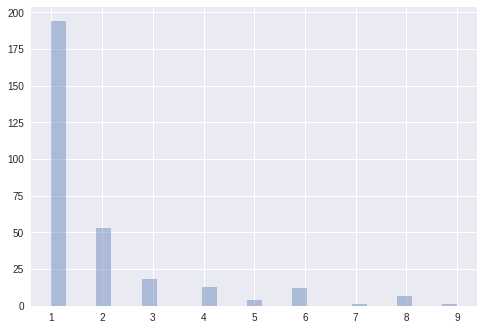

In [17]:
sns.distplot(city_populations_first_digits, kde=False)
pp.savefig("population_digits.png")

## How does this differ from randomly generated numbers?

### We have to duplicate all our prior code...
### ...Unless we put all the functionality in functions.

The resulting distribution should look something this:

![random digits](./random_digits.png)

In [ ]:
random_numbers = np.random.random_integers(99999, 10000000, len(city_populations_strings))

In [ ]:
sns.distplot(random_numbers_first_digits, kde=False)
